In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = engine.execute('SELECT date FROM measurement ORDER BY date DESC').first()[0]

last_date

'2017-08-23'

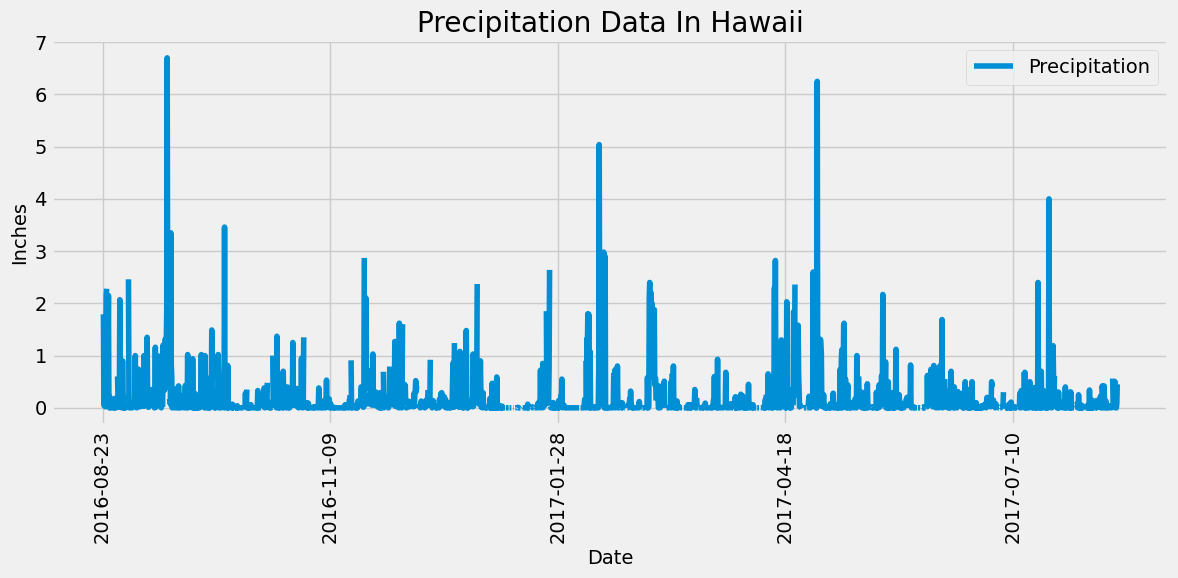

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent=session.query(func.max(measurement.date)).scalar()

# Calculate the date one year from the last date in data set.
one_year = pd.to_datetime(last_date) - pd.DateOffset(years=1)
one_year_ago_str = one_year.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
          filter(measurement.date >= one_year_ago_str).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df_precipitation = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title('Precipitation Data In Hawaii')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

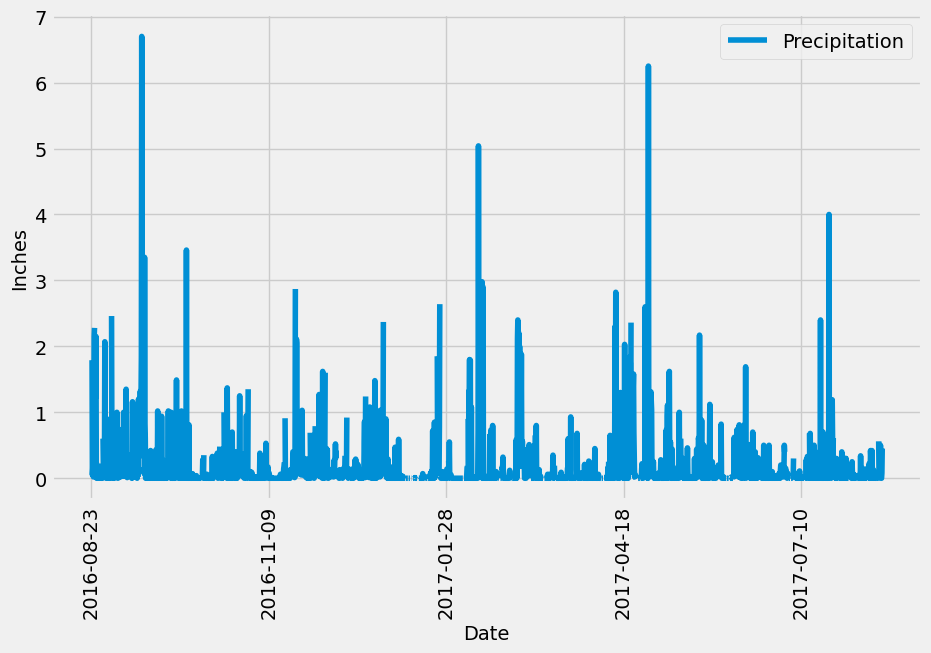

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_precipitation.plot(figsize=(10, 6))

plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90);

# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(station.station)).scalar()
stations

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

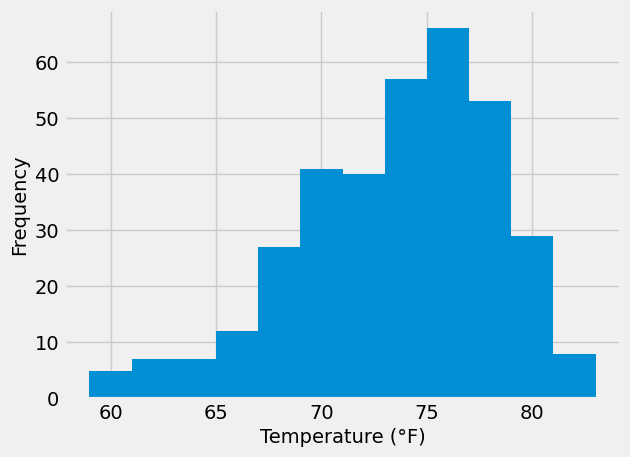

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = active_stations[0][0]

results = session.query(measurement.tobs).\
          filter(measurement.station == most_active_station).\
          filter(measurement.date >= one_year_ago_str).all()

temperatures = [result[0] for result in results]

plt.hist(temperatures, bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()